In [114]:
import pandas as pd
import numpy as np


def uniquevalues(df):
    
    
    cat_columns = ['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory']
    for col in cat_columns:
        print('The unique values in {} are: {} and includes {}'.format(col,df[col].nunique(),
              np.unique(df[col].values,return_counts=True)),'\n')
        
def read_into_df(filename,sheetname,droplabels):
    data = pd.read_excel(filename,sheetname,index_col=0)
    data.drop(labels=droplabels,axis=1,inplace=True)
    return data
    
        
def missing_categories(df1,df2):
    cat_columns = ['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory']
    for col in cat_columns:
        if df1[col].nunique != df2[col].nunique():
            missing_values=set(np.unique(df1[col].values))-set(np.unique(df2[col].values))
            mydict = {}
            for value in missing_values:
                count = df1[col].value_counts()[value]
                mydict[value] = count
        print("The categories not present in test data column {} are: {}, and their count in train data is {}".
              format(col,missing_values,mydict),'\n')
        
def extractFeatureTarget(df):
    features = df.iloc[:,:-1]
    target = df.iloc[:, df.columns.get_loc('NPS_Status')]
    return features,target

def concatenate_get_dummies(trainData,testData,axis):
    cat_columns = ['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory']
    training_length = len(trainData)
    dataset = pd.concat(objs=[trainData,testData],axis=axis)
    dataset = pd.get_dummies(dataset,columns=cat_columns,prefix=cat_columns,drop_first=True)
    train_preprocessed = dataset[:training_length]
    test_preprocessed = dataset[training_length:]
    return train_preprocessed,test_preprocessed

def convToArray(df_X,df_y):
    features = df_X.columns
    X = df_X.values
    y = df_y.values
    return X,y,features
    #return X,labelEncoding(y)

def labelEncoding(le):
        labelencoder = LabelEncoder()
        le = labelencoder.fit_transform(le)
        return le

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import graphviz

classifiers = ['KNeighbors','LogisticRegression','LogisticRegression_l1','LinearSVC',
               'DecisionTree','RandomForest','GradientBoosting','SVC']


def classifier(X_train,X_test,y_train,y_test):
    
    training_accuracy = []
    testing_accuracy = []
    
    for classifier in classifiers:
    
        if classifier=='KNeighbors':
        #neighborsToTry = range(1,11)
        #training_accuracy = []
        #test_accuracy = []
        #for neighbors in neighborsToTry:
            #kneighborsclassifier = KNeighborsClassifier(n_neighbors=neighbors)
            #kneighborsclassifier.fit(X,y)
            #trainScore = kneighborsclassifier.score(X,y)
            #training_accuracy.append(trainScore)
            #testScore = kneighborsclassifier.score(X_test,y_test)
            #test_accuracy.append(testScore)
        
            kneighborsclassifier = KNeighborsClassifier()
            score_train=kneighborsclassifier.fit(X_train,y_train).score(X_train,y_train)
            score_test = kneighborsclassifier.score(X_test,y_test)        
            
            training_accuracy.append(score_train)
            testing_accuracy.append(score_test)
        
        
        #plt.plot(neighborsToTry,training_accuracy,label='training_accuracy')
        #plt.plot(neighborsToTry,test_accuracy,label='test_accuracy')
        #plt.legend()
        #plt.show()
        
        elif classifier=='LogisticRegression':
            logisticregression = LogisticRegression()
            logisticregression.fit(X_train,y_train)
            #logisticregression.predict(X_test)
            score_train=logisticregression.score(X_train,y_train)
            score_test = logisticregression.score(X_test,y_test)
            #print('The accuracy of Logistic Regression Model is: {}'.format(score))
            
            training_accuracy.append(score_train)
            testing_accuracy.append(score_test)
            
        #plt.plot(logisticregression.coef_.T,'o',label="C=Default")
        #plt.xticks(range(X_train.shape[1]),features,rotation=90)
        #plt.ylimit(-7,7)
        #plt.legend() 
        
        elif classifier=="LogisticRegression_l1":
            logisticregression_l1 = LogisticRegression(penalty='l1')
            logisticregression_l1.fit(X_train,y_train)
            #logisticregression_l1.predict(X_test)
            
            score_train=logisticregression_l1.score(X_train,y_train)
            score_test=logisticregression_l1.score(X_test,y_test)
            
            training_accuracy.append(score_train)
            testing_accuracy.append(score_test)
        
        #plt.plot(logisticregression.coef_.T,'o',label="C=Default")
        #plt.xticks(range(X_train.shape[1]),features,rotation=90)
        #plt.ylimit(-7,7)
        #plt.legend()
        
        elif classifier=='LinearSVC':
            linearsvc=LinearSVC()
            score_train = linearsvc.fit(X_train,y_train).score(X_train,y_train)
            score_test=linearsvc.score(X_test,y_test)
            
            training_accuracy.append(score_train)
            testing_accuracy.append(score_test)
            
        elif classifier=='DecisionTree':
        
            tree = DecisionTreeClassifier(random_state=0)
            score_train = tree.fit(X_train,y_train).score(X_train,y_train)
            score_test = tree.score(X_test,y_test)
    
    
            training_accuracy.append(score_train)
            testing_accuracy.append(score_test)
            
        #tree.feature_importances_
        
        #plt.plot(tree.feature_importances_)
        #plt.xticks(range(X_train.shape[1]),features,rotation=90)
        #plt.ylimit(0,1)
        
        elif classifier=='RandomForest':
            forest = RandomForestClassifier(random_state=0)
            score_train = forest.fit(X_train,y_train).score(X_train,y_train)
            score_test = forest.score(X_test,y_test)
            
            training_accuracy.append(score_train)
            testing_accuracy.append(score_test)
            
        #plt.plot(forest.feature_importances_,'o')
        #plt.xticks(range(X_train.shape[1]),features,rotation=90)
        
        elif classifier=='GradientBoosting':
            gbc = GradientBoostingClassifier(random_state=0)
            score_train=gbc.fit(X_train,y_train).score(X_train,y_train)
            score_test = gbc.score(X_test,y_test)
            
            training_accuracy.append(score_train)
            testing_accuracy.append(score_test)
            
        #plt.plot(gbc.feature_importances_,'o')
        #plt.xticks(range(X_train.shape[1]),features,rotation=90)
        
        elif classifier=='SVC':
            svm = SVC()
            score_train = svm.fit(X_train,y_train).score(X_train,y_train)
            score_test = svm.score(X_test,y_test)
            
            training_accuracy.append(score_train)
            testing_accuracy.append(score_test)
            
        
    return training_accuracy,testing_accuracy,classifiers  

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def apply_MinMax(X_train,X_test):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled,X_test_scaled


def explained_variance(X_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_ss = scaler.transform(X_train)
    X_test_ss = scaler.transform(X_test)
    
    pca = PCA(n_components=None)
    pca.fit(X_train_ss)
    X_train_pca = pca.transform(X_train_ss)
    X_test_pca = pca.transform(X_test_ss)
    explained = pca.explained_variance_ratio_ 
    
    return X_train_pca,X_test_pca,explained


def components_to_PCA(explained_var,required_variance):
    variance = 0
    for i in range(0,63):
        if variance <= required_variance:
            variance = variance + explained_var[i]
            print(variance)
        else:
            print('You need first {} principal components to achieve {} variance'.format(i,required_variance))
            break

def apply_PCA(X_train,X_test,n_components):

    '''
    First applying StandardScaler to bring features to unit variance, and then
    doing the Principal Component Analysis
    '''
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)



    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    return X_train_pca,X_test_pca

'''
def apply_lda(X_train,X_test):
    
    LDA - Linear Discriminant Analysis, separates the most the classes
    of the dependent variable
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lda = LDA()
    X_train_lda = lda.fit_transform(X_train_scaled,y_train)
    X_test_lda = lda.transform(X_test_scaled)
    
    return X_train_da,X_test_lda
'''

'\ndef apply_lda(X_train,X_test):\n    \n    LDA - Linear Discriminant Analysis, separates the most the classes\n    of the dependent variable\n    \n    scaler = StandardScaler()\n    scaler.fit(X_train)\n    X_train_scaled = scaler.transform(X_train)\n    X_test_scaled = scaler.transform(X_test)\n    \n    lda = LDA()\n    X_train_lda = lda.fit_transform(X_train_scaled,y_train)\n    X_test_lda = lda.transform(X_test_scaled)\n    \n    return X_train_da,X_test_lda\n'

In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC

'''
Categorical Columns not being used inside paranthesis:
(HospitalNo2),(STATEZONE),MaritalStatus, Sex, BedCategory, Department, 
InsPayorCategory, (State), (Country),(AdmissionDate),(DischargeDate), 
NPS_Status, (Drop Serial Number)
'''    


'''
Reading Excel, dropping columns, and checking unique values in categorical 
columns of interest
'''
cat_columns = ['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory']
labels_drop=['HospitalNo2','State','STATEZONE','Country','AdmissionDate','DischargeDate','CE_NPS']
filename = 'ManipalHospitalExcel.xlsx'
training_sheet = 'Training Data or Binary Class'
test_sheet = 'Test Data for Binary Class'

#df = pd.read_excel('ManipalHospitalExcel.xlsx','Training Data or Binary Class',index_col=0)
#df_test = pd.read_excel('ManipalHospitalExcel.xlsx','Test Data for Binary Class',index_col=0)
#df.drop(labels=['HospitalNo2','State','STATEZONE','Country','AdmissionDate','DischargeDate'],axis=1,inplace=True)
#df_test.drop(labels=['HospitalNo2','State','STATEZONE','Country','AdmissionDate','DischargeDate'],axis=1,inplace=True)

df = read_into_df(filename,training_sheet,labels_drop)
df_test = read_into_df(filename,test_sheet,labels_drop)

missing_categories(df,df_test)

'''
The analysis above reveals that there are several categorical columns in the
test data that are missing values, hence I will concatenate the training data 
and the test data file against axis=0, use get_dummies, and then separate the 
two

'''

#Extracting Features,Target from both Train & Test Data
df_X,df_y = extractFeatureTarget(df)
df_X_test,df_y_test = extractFeatureTarget(df_test)


#Dummy Conversion
train_preprocessed,test_preprocessed = concatenate_get_dummies(df_X,df_X_test,axis=0)


#Converting to Array
X_train,y_train,features = convToArray(train_preprocessed,df_y)
X_test,y_test,features = convToArray(test_preprocessed,df_y_test)
#X_train = np.delete(X_train,train_preprocessed.columns.get_loc('CE_NPS'),axis=1)
#X_test = np.delete(X_test,train_preprocessed.columns.get_loc('CE_NPS'),axis=1)

The categories not present in test data column MaritalStatus are: {'Widowed', 'Divorced'}, and their count in train data is {'Widowed': 4, 'Divorced': 1} 

The categories not present in test data column Sex are: set(), and their count in train data is {} 

The categories not present in test data column BedCategory are: {'ITU', 'CCU', 'Renal ICU'}, and their count in train data is {'ITU': 1, 'CCU': 1, 'Renal ICU': 2} 

The categories not present in test data column Department are: set(), and their count in train data is {} 

The categories not present in test data column InsPayorcategory are: {'INTERNATIONAL'}, and their count in train data is {'INTERNATIONAL': 80} 



In [117]:
len(features)

63

In [ ]:
training_accuracy,testing_accuracy,classifiers = classifier(X_train,X_test,y_train,y_test)

'''
plt.plot(training_accuracy,label="training_accuracy")
plt.plot(testing_accuracy,label='test_accuracy')
plt.xticks(range(len(classifiers)),classifiers,rotation=90)
'''

#Here we apply MinMaxScaler
X_train_scaled, X_test_scaled = apply_MinMax(X_train,X_test)
training_accuracy_MinMax,testing_accuracy_MinMax,classifiers = classifier(X_train_scaled,X_test_scaled,y_train,y_test)

'''
plt.plot(training_accuracy_MinMax,label="training_accuracy_scaled")
plt.plot(testing_accuracy_MinMax,label='test_accuracy_scaled')
plt.xticks(range(len(classifiers)),classifiers,rotation=90)
'''

#Checking Explained Variance with PCA

X_train_pca,X_test_pca,explained = explained_variance(X_train,X_test)

'''
plt.plot(explained[:10],label="Variance Explained")
plt.xticks(range(10),range(1,11),rotation=90)
'''

components_to_PCA(explained,0.60)


#Running classifiers with Principal Components
X_train_pca,X_test_pca = apply_PCA(X_train,X_test,13)
training_accuracy_pca,testing_accuracy_pca,classifiers = classifier(X_train_pca,X_test_pca,y_train,y_test)

'''
plt.plot(training_accuracy_pca,label="training_accuracy_pca")
plt.plot(testing_accuracy_pca,label='test_accuracy_pca')
plt.xticks(range(len(classifiers)),classifiers,rotation=90)
'''

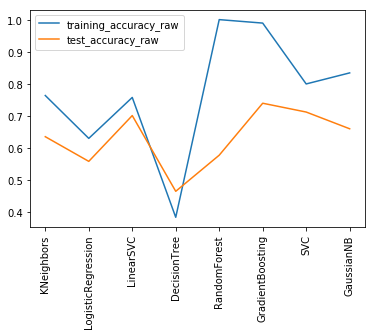

In [41]:
%matplotlib inline 
plt.plot(training_accuracy,label="training_accuracy_raw")
plt.plot(testing_accuracy,label='test_accuracy_raw')
plt.xticks(range(len(classifiers)),classifiers,rotation=90)
plt.legend()

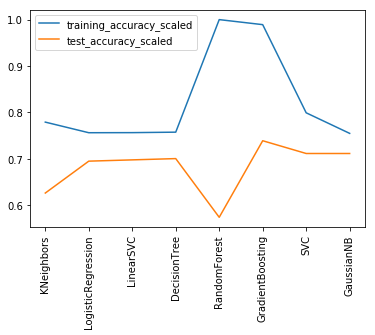

In [42]:
plt.plot(training_accuracy_MinMax,label="training_accuracy_scaled")
plt.plot(testing_accuracy_MinMax,label='test_accuracy_scaled')
plt.xticks(range(len(classifiers)),classifiers,rotation=90)
plt.legend()

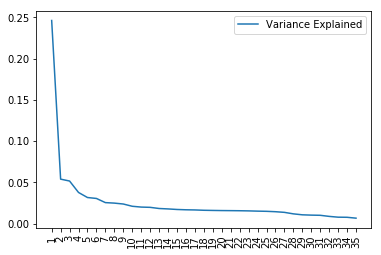

In [45]:
plt.plot(explained[:35],label="Variance Explained")
plt.xticks(range(35),range(1,36),rotation=90)
plt.legend()

In [50]:
np.sum(explained[:35])

0.90289719876019481

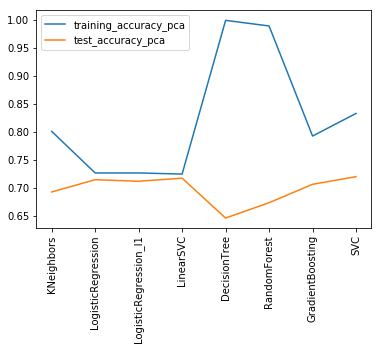

In [8]:
plt.plot(training_accuracy_pca,label="training_accuracy_pca")
plt.plot(testing_accuracy_pca,label='test_accuracy_pca')
plt.xticks(range(len(classifiers)),classifiers,rotation=90)
plt.legend()

In [9]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import time

kfold = KFold(n_splits=5,shuffle=True,random_state=0)
SCALER = [None,StandardScaler()]
FEATURES = [40,32,28,26,24]
REDUCER__N_COMPONENTS = [2,6,10,14,18,22]



In [88]:
training_accuracy_gridSearch = []
testing_accuracy_gridSearch = []
training_time_gridSearch = []
prediction_time_gridSearch = []
best_params_classifiers = {}

In [89]:
NEIGHBORS = range(1,11)

pipe = Pipeline([('scaler',StandardScaler()),
                 ('classifier',KNeighborsClassifier())])
            
param_grid = { 'scaler':SCALER,'classifier__n_neighbors': NEIGHBORS}
            
grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = grid.score(X_train,y_train)
print('Training Score {}'.format(score_train))
score_test = grid.score(X_test,y_test)
print('Testing Score {}'.format(score_test))
training_accuracy_gridSearch.append(score_train)
testing_accuracy_gridSearch.append(score_test)
training_time_gridSearch.append(f_time)
prediction_time_gridSearch.append(p_time)
            
best_params_classifiers['KNeighbors'] = grid.best_params_
print('Best Parameters {}'.format(grid.best_params_))

training time for <function classifier at 0x0000000007B02400> : 192.571
predict time: 0.233
Training Score 0.7712968530767689
Testing Score 0.695054945054945
Best Parameters {'classifier__n_neighbors': 8, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [90]:
PENALTY = ['l2','l1']
C_PARAM_LOG = [0.001,0.01,0.1,1,10,100]
            
pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    ('classifier',LogisticRegression())
                    ])
            
param_grid = { 'scaler':SCALER,
                    'classifier__penalty':PENALTY,
                    'classifier__C': C_PARAM_LOG,
                    }

logisticregression_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
logisticregression_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = logisticregression_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = logisticregression_grid.score(X_train,y_train)
print('Training Score {}'.format(score_train))
score_test = logisticregression_grid.score(X_test,y_test)
print('Testing Score {}'.format(score_test))
training_accuracy_gridSearch.append(score_train)
testing_accuracy_gridSearch.append(score_test)
training_time_gridSearch.append(f_time)
prediction_time_gridSearch.append(p_time)
            
best_params_classifiers['LogisticRegression'] = logisticregression_grid.best_params_
print('Best Parameters {}'.format(logisticregression_grid.best_params_))


training time for <function classifier at 0x0000000007B02400> : 40.347
predict time: 0.001
Training Score 0.7522549609140108
Testing Score 0.6978021978021978
Best Parameters {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'scaler': None}


In [91]:
logisticregression_grid.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', None), ('classifier', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [96]:
logisticregression_grid.best_estimator_.named_steps['classifier']

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
logisticregression_grid.best_estimator_.named_steps['classifier'].coef_

array([[ -5.77929188e-03,  -6.10791610e-07,   5.77613764e-02,
          4.23014041e-01,   5.00866458e-01,  -2.42231417e-02,
         -7.55567759e-02,  -1.04295523e-01,  -4.70000418e-04,
         -2.54398219e-03,   2.41022968e-01,  -7.89728103e-02,
         -6.14905470e-02,   6.48313625e-02,  -7.15939018e-03,
          4.38874742e-02,   8.03679060e-02,   1.65333922e-01,
          2.40062265e-02,  -8.83309863e-02,   0.00000000e+00,
          2.07940188e-01,   1.65125157e-01,  -1.52876939e-01,
         -6.03864412e-02,   9.49510314e-02,  -1.31291673e-02,
         -8.04710412e-03,  -1.93137038e-01,  -1.02572428e-02,
         -5.19142314e-03,  -5.06467693e-02,   9.21894538e-02,
         -1.29196191e-01,   1.47487214e-01,   2.70758662e-02,
          7.85890577e-02,   5.89916516e-03,  -1.01902503e+00,
          0.00000000e+00,  -1.29502231e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

In [103]:
#plt.plot(logisticregression_grid.best_estimator_.named_steps['classifier'].coef_.T,'o',label="C=Default")
#plt.xticks(range(X_train.shape[1]),features,rotation=90)
#plt.ylimit(-7,7)
#plt.legend()

In [118]:
features

Index(['AgeYrs', 'Estimatedcost', 'CE_ACCESSIBILITY', 'CE_CSAT',
       'CE_VALUEFORMONEY', 'EM_IMMEDIATEATTENTION', 'EM_NURSING', 'EM_DOCTOR',
       'EM_OVERALL', 'AD_TIME', 'AD_TARRIFFPACKAGESEXPLAINATION',
       'AD_STAFFATTITUDE', 'INR_ROOMCLEANLINESS', 'INR_ROOMPEACE',
       'INR_ROOMEQUIPMENT', 'INR_ROOMAMBIENCE', 'FNB_FOODQUALITY',
       'FNB_FOODDELIVERYTIME', 'FNB_DIETICIAN', 'FNB_STAFFATTITUDE',
       'AE_ATTENDEECARE', 'AE_PATIENTSTATUSINFO', 'AE_ATTENDEEFOOD',
       'DOC_TREATMENTEXPLAINATION', 'DOC_ATTITUDE', 'DOC_VISITS',
       'DOC_TREATMENTEFFECTIVENESS', 'NS_CALLBELLRESPONSE',
       'NS_NURSESATTITUDE', 'NS_NURSEPROACTIVENESS', 'NS_NURSEPATIENCE',
       'OVS_OVERALLSTAFFATTITUDE', 'OVS_OVERALLSTAFFPROMPTNESS',
       'OVS_SECURITYATTITUDE', 'DP_DISCHARGETIME', 'DP_DISCHARGEQUERIES',
       'DP_DISCHARGEPROCESS', 'LengthofStay', 'MaritalStatus_Married',
       'MaritalStatus_Separated', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'Sex_M', 'BedCatego

In [104]:

C_PARAM_LSVC = [0.001,0.01,0.1,1,10,100]
            
pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    ('classifier',LinearSVC())
                    ])
            
param_grid = {
                    'scaler':SCALER,
                    'classifier__C': C_PARAM_LSVC,
                    }

linearsvc_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
linearsvc_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = linearsvc_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = linearsvc_grid.score(X_train,y_train)
print('Training Score {}'.format(score_train))
score_test = linearsvc_grid.score(X_test,y_test)
print('Testing Score {}'.format(score_test))
training_accuracy_gridSearch.append(score_train)
testing_accuracy_gridSearch.append(score_test)
training_time_gridSearch.append(f_time)
prediction_time_gridSearch.append(p_time)
            
best_params_classifiers['LinearSVC'] = linearsvc_grid.best_params_
print('Best Parameters {}'.format(linearsvc_grid.best_params_))


training time for <function classifier at 0x0000000007B02400> : 122.574
predict time: 0.001
Training Score 0.7570655441972339
Testing Score 0.6978021978021978
Best Parameters {'classifier__C': 0.01, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [105]:
CRITERION = ['gini','entropy']
SPLITTER = ['best','random']
MIN_SAMPLES_SPLIT = [8,10,12,14,16]
MAX_DEPTH = [6,12,18]
CLASS_WEIGHT = ['balanced',None]
            
pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    ('classifier',DecisionTreeClassifier())
                    ])
            
param_grid = {
                'scaler': SCALER,
                'classifier__criterion': CRITERION,
                'classifier__splitter': SPLITTER,
                
                'classifier__min_samples_split': MIN_SAMPLES_SPLIT,
                'classifier__class_weight': CLASS_WEIGHT,
            }

decisiontree_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
decisiontree_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = decisiontree_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = decisiontree_grid.score(X_train,y_train)
print('Training Score {}'.format(score_train))
score_test = decisiontree_grid.score(X_test,y_test)
print('Testing Score {}'.format(score_test))
training_accuracy_gridSearch.append(score_train)
testing_accuracy_gridSearch.append(score_test)
training_time_gridSearch.append(f_time)
prediction_time_gridSearch.append(p_time)
            
best_params_classifiers['DecisionTreeClassifier'] = decisiontree_grid.best_params_
print('Best Parameters {}'.format(decisiontree_grid.best_params_))

training time for <function classifier at 0x0000000007B02400> : 41.987
predict time: 0.003
Training Score 0.8813389456804971
Testing Score 0.6730769230769231
Best Parameters {'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__min_samples_split': 14, 'classifier__splitter': 'random', 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

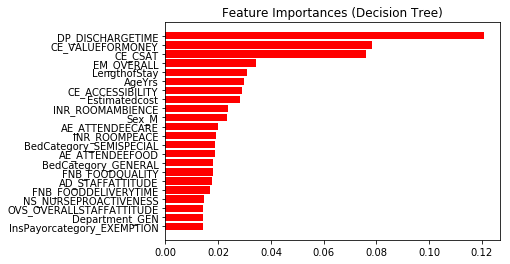

In [202]:
importances = decisiontree_grid.best_estimator_.named_steps['classifier'].feature_importances_
indices = np.argsort(decisiontree_grid.best_estimator_.named_steps['classifier'].feature_importances_)
indices_used = indices[-22:]

plt.figure()
plt.title('Feature Importances (Decision Tree)')
plt.barh(np.array(range(22)),importances[indices_used],color='r',align='center')
plt.yticks(np.array(range(22)),features[indices_used])
plt.ylim([-1,np.array(range(22))])
plt.show()

In [172]:
ESTIMATOR = [10,30,50,70,90,110]
CRITERION_RFC = ['gini','entropy']
FEATURES = ['auto',8,10,12]
MIN_SAMPLES_SPLIT = [2,4,6,8]
CLASS_WEIGHT = ['balanced',None]
            


pipe = Pipeline([
                    ('scaler',StandardScaler()),
                   
                    ('classifier',RandomForestClassifier(n_jobs=-1,random_state=42))
                    ])
            
param_grid = {
                'scaler': SCALER,
               
                'classifier__n_estimators' : ESTIMATOR,
                'classifier__criterion': CRITERION,
                'classifier__max_features': FEATURES,
                'classifier__min_samples_split': MIN_SAMPLES_SPLIT,
                'classifier__class_weight': CLASS_WEIGHT,
            }

randomforest_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
randomforest_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = randomforest_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = randomforest_grid.score(X_train,y_train)
print('Training Score {}'.format(score_train))
score_test = randomforest_grid.score(X_test,y_test)
print('Testing Score {}'.format(score_test))
training_accuracy_gridSearch.append(score_train)
testing_accuracy_gridSearch.append(score_test)
training_time_gridSearch.append(f_time)
prediction_time_gridSearch.append(p_time)
            
best_params_classifiers['RandomForestClassifier'] = randomforest_grid.best_params_
print('Best Parameters {}'.format(randomforest_grid.best_params_))

training time for <function classifier at 0x0000000007B02400> : 3836.716
predict time: 0.104
Training Score 0.9757466426137502
Testing Score 0.7335164835164835
Best Parameters {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_features': 8, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 90, 'scaler': None}


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

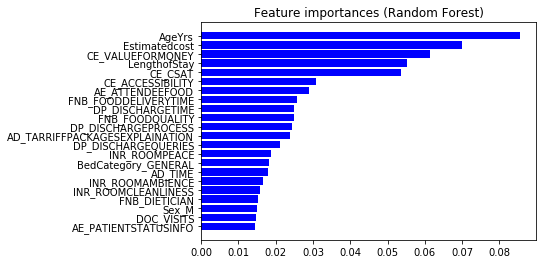

In [205]:
randomforest_importances = randomforest_grid.best_estimator_.named_steps['classifier'].feature_importances_
std = np.std([tree.feature_importances_ for tree in randomforest_grid.best_estimator_.named_steps['classifier'].estimators_],
             axis=0)
rf_indices = np.argsort(randomforest_importances)
rf_features = features[rf_indices]
rf_indices_used = rf_indices[-22:]
rf_features_used = features[rf_indices_used]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances (Random Forest)")
plt.barh(range(22), randomforest_importances[rf_indices_used],
       color="b", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(22), rf_features_used)
plt.ylim([-1, range(22)])
plt.show()

In [179]:
ESTIMATOR = [10,50,70,100]
MIN_SAMPLES_SPLIT = [2,4,6,8]
LEARNINGRATE = [0.001,0.01,0.1]
MAXDEPTH = [2,3,5,7,9]
CLASS_WEIGHT = ['balanced',None]


pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    
                    ('classifier',GradientBoostingClassifier(random_state=42))
                    ])
            
param_grid = {
                'scaler': SCALER,
                
                'classifier__learning_rate': LEARNINGRATE,
                'classifier__n_estimators' : ESTIMATOR,
                'classifier__min_samples_split': MIN_SAMPLES_SPLIT,
                'classifier__max_depth': MAXDEPTH
}

gradientboosting_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
gradientboosting_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = gradientboosting_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = gradientboosting_grid.score(X_train,y_train)
print('Training Score {}'.format(score_train))
score_test = gradientboosting_grid.score(X_test,y_test)
print('Testing Score {}'.format(score_test))
training_accuracy_gridSearch.append(score_train)
testing_accuracy_gridSearch.append(score_test)
training_time_gridSearch.append(f_time)
prediction_time_gridSearch.append(p_time)
            
best_params_classifiers['GradientBoostingClassifier'] = gradientboosting_grid.best_params_
print('Best Parameters {}'.format(gradientboosting_grid.best_params_))


training time for <function classifier at 0x0000000007B02400> : 4196.25
predict time: 0.001
Training Score 0.7889356584485869
Testing Score 0.7142857142857143
Best Parameters {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 70, 'scaler': None}


In [17]:
C_PARAM = [0.001,0.01,0.1,1,10,100]
GAMMA_PARAM = [0.001,0.01,0.1,1,10,100]
KERNEL = ['rbf','sigmoid']
            
pipe = Pipeline([
                    ('scaler',StandardScaler()),
                   
                    ('classifier',SVC())
                    ])
            
param_grid = {
                    'scaler':SCALER,
                    
                    'classifier__C': C_PARAM,
                    'classifier__gamma': GAMMA_PARAM,
                    'classifier__kernel': KERNEL
                    }

svc_gridscv = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
svc_gridscv.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = svc_gridscv.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = svc_gridscv.score(X_train,y_train)
print('Training Score {}'.format(score_train))
score_test = svc_gridscv.score(X_test,y_test)
print('Testing Score {}'.format(score_test))
training_accuracy_gridSearch.append(score_train)
testing_accuracy_gridSearch.append(score_test)
training_time_gridSearch.append(f_time)
prediction_time_gridSearch.append(p_time)
            
best_params_classifiers['SVC'] = svc_gridscv.best_params_
print('Best Parameters {}'.format(svc_gridscv.best_params_))


training time for <function classifier at 0x0000000007B02400> : 6258.984
predict time: 0.292
Training Score 0.8025656444177189
Testing Score 0.7060439560439561
Best Parameters {'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [18]:
from sklearn.naive_bayes import GaussianNB

pipe = Pipeline([
                    ('scaler',StandardScaler()),
                   
                    ('classifier',GaussianNB())
                    ])
            
param_grid = {
                    'scaler':SCALER,
                    
                    }

grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = grid.score(X_train,y_train)
print('Training Score {}'.format(score_train))
score_test = grid.score(X_test,y_test)
print('Testing Score {}'.format(score_test))
training_accuracy_gridSearch.append(score_train)
testing_accuracy_gridSearch.append(score_test)
training_time_gridSearch.append(f_time)
prediction_time_gridSearch.append(p_time)
            
best_params_classifiers['SVC'] = grid.best_params_
print('Best Parameters {}'.format(grid.best_params_))

training time for <function classifier at 0x0000000007B02400> : 1.061
predict time: 0.0
Training Score 0.6758869512928443
Testing Score 0.6620879120879121
Best Parameters {'scaler': None}


In [19]:
classifiers = ['KNeighbors',
 'LogisticRegression',
 'LinearSVC',
 'DecisionTree',
 'RandomForest',
 'GradientBoosting',
 'SVC',
'GaussianNB']

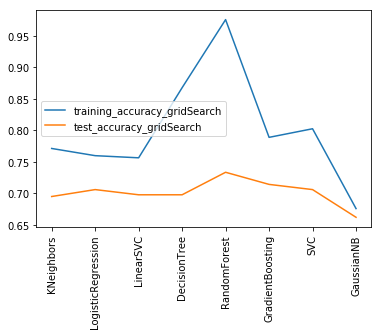

In [20]:
plt.plot(training_accuracy_gridSearch,label="training_accuracy_gridSearch")
plt.plot(testing_accuracy_gridSearch,label='test_accuracy_gridSearch')
plt.xticks(range(len(classifiers)),classifiers,rotation=90)
plt.legend()

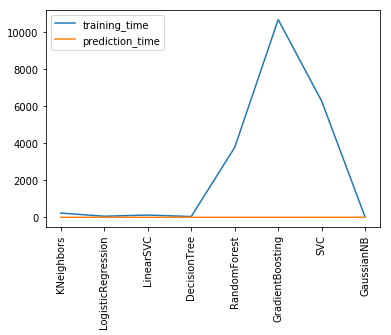

In [51]:
plt.plot(training_time_gridSearch,label="training_time")
plt.plot(prediction_time_gridSearch,label='prediction_time')
plt.xticks(range(len(classifiers)),classifiers,rotation=90)
plt.legend()

In [23]:
training_accuracy_fs = []
testing_accuracy_fs = []

best_params_classifiers_fs = {}

kfold = KFold(n_splits=5,shuffle=True,random_state=0)
SCALER = [None,StandardScaler()]
FEATURES = [40,32,28,26,24]
REDUCER__N_COMPONENTS = [2,6,10,14,18,22]

In [80]:
training_time_fs = []
prediction_time_fs = []

In [24]:
NEIGHBORS = range(1,11)

pipe = Pipeline([
                            ('scaler',StandardScaler()),
                            ('selector',RFE(RandomForestClassifier(n_estimators=10,random_state=42))),
                             ('classifier',
                             KNeighborsClassifier())])
param_grid = {
                    'scaler': SCALER,
                    'selector__n_features_to_select':FEATURES,
                    'classifier__n_neighbors': NEIGHBORS
                    }
knn_grid = GridSearchCV(pipe,param_grid,cv=kfold)


fit_time = time.time()            
knn_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = knn_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = knn_grid.score(X_train,y_train)
score_test = knn_grid.score(X_test,y_test)
training_accuracy_fs.append(score_train)
testing_accuracy_fs.append(score_test)
training_time_fs.append(f_time)
prediction_time_fs.append(p_time)
            
best_params_classifiers_fs[classifier] = knn_grid.best_params_

training time for <function classifier at 0x0000000007B02400> : 4240.01
predict time: 0.485


In [27]:
print(score_train)
print(score_test)

0.776909200241
0.695054945055


In [29]:
PENALTY = ['l2','l1']
C_PARAM_LOG = [0.001,0.01,0.1,1,10,100]
            
pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    ('selector',RFE(RandomForestClassifier(n_estimators=10,random_state=42))),
                   
                    ('classifier',LogisticRegression())
                    ])
            
param_grid = {
                    'scaler':SCALER,
                    'selector__n_features_to_select':FEATURES,
                    
                    'classifier__penalty':PENALTY,
                    'classifier__C': C_PARAM_LOG,
                    }
lr_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
lr_grid.fit(X_train,y_train)
f_time = round(time.time() - fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = lr_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = lr_grid.score(X_train,y_train)
score_test = lr_grid.score(X_test,y_test)
training_accuracy_fs.append(score_train)
testing_accuracy_fs.append(score_test)
training_time_fs.append(f_time)
prediction_time_fs.append(p_time)

best_params_classifiers_fs[classifier] = lr_grid.best_params_

training time for <function classifier at 0x0000000007B02400> : 1924.09
predict time: 0.0


In [30]:

C_PARAM_LSVC = [0.001,0.01,0.1,1,10,100]
            
pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    ('selector',RFE(RandomForestClassifier(n_estimators=10,random_state=42))),
                    
                    ('classifier',LinearSVC())
                    ])
            
param_grid = {
                    'scaler':SCALER,
                    'selector__n_features_to_select':FEATURES,
                   
                 
                    'classifier__C': C_PARAM_LSVC,
                    }

lsvc_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
lsvc_grid.fit(X_train,y_train)
f_time = round(time.time()-f_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = lsvc_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = lsvc_grid.score(X_train,y_train)
score_test = lsvc_grid.score(X_test,y_test)
training_accuracy_fs.append(score_train)
testing_accuracy_fs.append(score_test)
training_time_fs.append(f_time)
prediction_time_fs.append(p_time)
            
best_params_classifiers_fs[classifier] = lsvc_grid.best_params_

training time for <function classifier at 0x0000000007B02400> : 1525296809.458
predict time: 0.001


In [31]:
CRITERION = ['gini','entropy']
SPLITTER = ['best','random']
MIN_SAMPLES_SPLIT = [2,4,6,8]
CLASS_WEIGHT = ['balanced',None]
            
pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    ('selector',RFE(RandomForestClassifier(n_estimators=10,random_state=42))),
                   
                    ('classifier',DecisionTreeClassifier())
                    ])
            
param_grid = {
                'scaler': SCALER,
                'selector__n_features_to_select':FEATURES,
                
                'classifier__criterion': CRITERION,
                'classifier__splitter': SPLITTER,
                'classifier__min_samples_split': MIN_SAMPLES_SPLIT,
                'classifier__class_weight': CLASS_WEIGHT,
            }

dt_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
dt_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = dt_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = dt_grid.score(X_train,y_train)
score_test = dt_grid.score(X_test,y_test)
training_accuracy_fs.append(score_train)
testing_accuracy_fs.append(score_test)
training_time_fs.append(f_time)
prediction_time_fs.append(p_time)
            
best_params_classifiers_fs[classifier] = dt_grid.best_params_

training time for <function classifier at 0x0000000007B02400> : 3823.367
predict time: 0.001


In [32]:
ESTIMATOR = [30,70,90,110]
CRITERION_RFC = ['gini','entropy']
rfc_FEATURES = ['auto',8,10,12]
MIN_SAMPLES_SPLIT = [2,4,6,8]
CLASS_WEIGHT = ['balanced',None]
            


pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    
                    
                    ('classifier',RandomForestClassifier(n_jobs=-1,random_state=42))
                    ])
            
param_grid = {
                'scaler': SCALER,
                
                
                'classifier__n_estimators' : ESTIMATOR,
                'classifier__criterion': CRITERION_RFC,
                'classifier__max_features': rfc_FEATURES,
                'classifier__min_samples_split': MIN_SAMPLES_SPLIT,
                'classifier__class_weight': CLASS_WEIGHT,
            }

rt_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
rt_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = rt_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = rt_grid.score(X_train,y_train)
score_test = rt_grid.score(X_test,y_test)
training_accuracy_fs.append(score_train)
testing_accuracy_fs.append(score_test)
training_time_fs.append(f_time)
prediction_time_fs.append(p_time)
            
best_params_classifiers_fs[classifier] = rt_grid.best_params_

training time for <function classifier at 0x0000000007B02400> : 2785.533
predict time: 0.105


In [36]:
ESTIMATOR = [10,50,70,100]
MIN_SAMPLES_SPLIT = [2,4,6,8]
LEARNINGRATE = [0.001,0.01,0.1]
MAXDEPTH = [2,3,5,7,9]
CLASS_WEIGHT = ['balanced',None]


pipe = Pipeline([
                    ('scaler',StandardScaler()),
                  
                    
                    ('classifier',GradientBoostingClassifier(random_state=42))
                    ])
            
param_grid = {
                'scaler': SCALER,
                
               
                'classifier__learning_rate': LEARNINGRATE,
                'classifier__n_estimators' : ESTIMATOR,
                'classifier__min_samples_split': MIN_SAMPLES_SPLIT,
                'classifier__max_depth': MAXDEPTH
                
            }

gb_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
gb_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = gb_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = gb_grid.score(X_train,y_train)
score_test = gb_grid.score(X_test,y_test)
training_accuracy_fs.append(score_train)
testing_accuracy_fs.append(score_test)
training_time_fs.append(f_time)
prediction_time_fs.append(p_time)
            
best_params_classifiers_fs[classifier] = gb_grid.best_params_

training time for <function classifier at 0x0000000007B02400> : 3690.28
predict time: 0.0


In [69]:
training_accuracy_fs.append(gb_grid.score(X_train,y_train))

In [70]:
gb_grid.score(X_train,y_train)

0.78893565844858693

In [71]:
gb_grid.score(X_test,y_test)

0.7142857142857143

In [38]:
C_PARAM = [0.001,0.01,0.1,1,10,100]
GAMMA_PARAM = [0.001,0.01,0.1,1,10,100]
FEATURES = [40,32,28,26,24,18,14]
KERNEL = ['rbf','sigmoid']
            
pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    ('selector',RFE(RandomForestClassifier(n_estimators=10,random_state=42))),
                   
                    ('classifier',SVC())
                    ])
            
param_grid = {
                    'scaler':SCALER,
                    'selector__n_features_to_select':FEATURES,
                  
                    'classifier__C': C_PARAM,
                    'classifier__gamma': GAMMA_PARAM,
                    'classifier__kernel': KERNEL
                    }

svc_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
svc_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = svc_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = svc_grid.score(X_train,y_train)
score_test = svc_grid.score(X_test,y_test)
training_accuracy_fs.append(score_train)
testing_accuracy_fs.append(score_test)
training_time_fs.append(f_time)
prediction_time_fs.append(p_time)
            
best_params_classifiers_fs[classifier] = svc_grid.best_params_

training time for <function classifier at 0x0000000007B02400> : 32229.517
predict time: 0.195


In [72]:
training_accuracy_fs.append(svc_grid.score(X_train,y_train))

In [206]:
svc_grid.score(X_train,y_train)

0.78973742232912403

In [207]:
svc_grid.score(X_test,y_test)

0.70879120879120883

In [40]:
FEATURES = [40,32,28,26,24,18,14]
pipe = Pipeline([
                    ('scaler',StandardScaler()),
                    ('selector',RFE(RandomForestClassifier(n_estimators=10,random_state=42))),
                   
                    ('classifier',GaussianNB())
                    ])
            
param_grid = {
                    'scaler':SCALER,
                    'selector__n_features_to_select':FEATURES
                    
                    }

gnb_grid = GridSearchCV(pipe,param_grid,cv=kfold)
            
fit_time = time.time()            
gnb_grid.fit(X_train,y_train)
f_time = round(time.time()-fit_time,3)
print('training time for {} : {}'.format(classifier,f_time))
pred_time = time.time()
predictions = gnb_grid.predict(X_test)
p_time = round(time.time()-pred_time,3)
print('predict time: {}'.format(p_time))
            
score_train = gnb_grid.score(X_train,y_train)
print('Training Score {}'.format(score_train))
score_test = gnb_grid.score(X_test,y_test)
print('Testing Score {}'.format(score_test))
training_accuracy_fs.append(score_train)
testing_accuracy_fs.append(score_test)
training_time_fs.append(f_time)
prediction_time_fs.append(p_time)
            
best_params_classifiers_fs['GaussianNB'] = gnb_grid.best_params_
print('Best Parameters {}'.format(gnb_grid.best_params_))

training time for <function classifier at 0x0000000007B02400> : -348.819
predict time: 0.0
Training Score 0.6939266386049309
Testing Score 0.6895604395604396
Best Parameters {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'selector__n_features_to_select': 14}


In [74]:
#training_accuracy_fs = training_accuracy_fs[:-1]
training_accuracy_fs

[0.77690920024052912,
 0.75967127680897972,
 0.75686510322709966,
 0.93565844858689118,
 0.97574664261375021,
 0.78893565844858693,
 0.79053918620966124]

In [64]:
#testing_accuracy_fs = testing_accuracy_fs[:-1]
testing_accuracy_fs

[0.69505494505494503,
 0.70329670329670335,
 0.6785714285714286,
 0.64010989010989006,
 0.73351648351648346,
 0.7142857142857143,
 0.70604395604395609]

In [59]:
training_time_fs = training_time_fs[:-1]
prediction_time_fs = prediction_time_fs[:-1]

In [62]:
classifiers_gscv = classifiers[:-1]

In [79]:
prediction_time_fs

[0.485, 0.0, 0.001, 0.001, 0.105, 0.0]

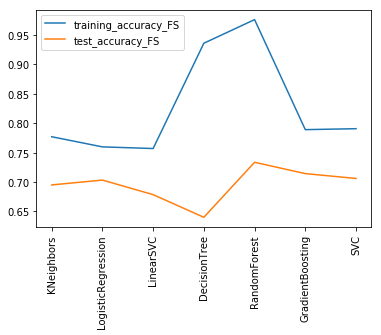

In [75]:
plt.plot(training_accuracy_fs,label="training_accuracy_FS")
plt.plot(testing_accuracy_fs,label='test_accuracy_FS')
plt.xticks(range(len(classifiers_gscv)),classifiers_gscv,rotation=90)
plt.legend()

In [81]:
'''
plt.plot(training_time_fs,label="training_time_fs")
plt.plot(prediction_time_fs,label='prediction_time_fs')
plt.xticks(range(len(classifiers_gscv)),classifiers_gscv,rotation=90)
plt.legend()
'''

'\nplt.plot(training_time_fs,label="training_time_fs")\nplt.plot(prediction_time_fs,label=\'prediction_time_fs\')\nplt.xticks(range(len(classifiers_gscv)),classifiers_gscv,rotation=90)\nplt.legend()\n'